<a href="https://colab.research.google.com/github/samirp92/Final-Year-Project-Time-Series-Forecasting-/blob/main/Electric_Power_Consumption_Forecasting_Student_ID_21072112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the required libraries

In [ ]:
# Disable warnings in the notebook for maintaining clean output
import warnings
warnings.filterwarnings('ignore')

# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Set the root path directory
root_path = "/content/drive/MyDrive/Final Year Project"

# Data Loading

In [ ]:
# Load the data from google drive
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/household_power_consumption.txt", sep=';')
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

# Confirm the updated data types
print(df.dtypes)

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


Data Imputation

In [ ]:
# Check Missing Values
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
# Fill NAN value using forward fill
df.fillna(method='ffill', axis=0, inplace=True)

# Feature Engineering

In [ ]:
# Convert the 'Date' and 'Time' columns to a single 'date_time' column
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [ ]:
# Convert the 'date_time' column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Set the 'date_time' column as the index
df.set_index('date_time', inplace=True)

# Drop the original 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

In [ ]:
# Create new columns for minute, hour, year, quarter, month, and day
df['minute'] = df.index.minute
df['hour'] = df.index.hour
df['day'] = df.index.day
df['week_of_year'] = df.index.isocalendar().week
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

In [ ]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,minute,hour,day,week_of_year,day_of_week,month,quarter,year,day_of_year
date_time,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,24,17,16,50,5,12,4,2006,350
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,25,17,16,50,5,12,4,2006,350
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,26,17,16,50,5,12,4,2006,350
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,27,17,16,50,5,12,4,2006,350
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,28,17,16,50,5,12,4,2006,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,58,20,26,47,4,11,4,2010,330
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,59,20,26,47,4,11,4,2010,330
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,0,21,26,47,4,11,4,2010,330


In [ ]:
# Creating Target Variable power consumption in watt hour
equation1 = (df['Global_active_power']*1000/60)
equation2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = equation1 - equation2
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,minute,hour,day,week_of_year,day_of_week,month,quarter,year,day_of_year,power_consumption
date_time,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,24,17,16,50,5,12,4,2006,350,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,25,17,16,50,5,12,4,2006,350,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,26,17,16,50,5,12,4,2006,350,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,27,17,16,50,5,12,4,2006,350,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,28,17,16,50,5,12,4,2006,350,43.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,58,20,26,47,4,11,4,2010,330,15.766667
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,59,20,26,47,4,11,4,2010,330,15.733333
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,0,21,26,47,4,11,4,2010,330,15.633333


In [ ]:
# Print the number of rows and columns in the data
print('Number of rows and columns:', df.shape)

# Print the minimum and maximum date_time values
print('\nMinimum date_time:', df.index.min())
print('\nMaximum date_time:', df.index.max())

Number of rows and columns: (2075259, 17)

Minimum date_time: 2006-12-16 17:24:00

Maximum date_time: 2010-11-26 21:02:00


# Exploratory Data Analysis(EDA)

As we have only 16 records for 2006 year, which may deceive our analysis. As we will analyse the data yearly and this 16 records will not help us understand the data flow for the year 2006. We will remove those 16 records of 2006 and move ahead for analysis of remaining four year data.

Reason of unavailabilty of data for 2006 could be, data collection might have started for analysis if from 16th december 2006 or else the previous data might have lost due to some serious problem or due to unavailabilty of proper required data for analysis like missing of some features or so.

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(30,10))
autocorrelation_plot(df["power_consumption"])
plt.show()

In [ ]:
'''# filter out 2006 data, only keep data post 2006
df2 = df2[df2.index.year>2006]
'''

'# filter out 2006 data, only keep data post 2006\ndf2 = df2[df2.index.year>2006]\n'

As we have data for each minute for each day, we will group the data day-wise, so we will get dataset for per day (where all each minute data is grouped for same date)

In [ ]:
#df.to_csv('household_power_consumption1.csv')

In [ ]:
# Resample the data for more meaningful time series analysis (e.g., daily, weekly)
daily_resampled = df.resample('D').mean()
weekly_resampled = df.resample('W').mean()
monthly_resampled = df.resample('M').mean()
yearly_resampled = df.resample('Y').mean()

# Check whether the data is grouped day-wise
weekly_resampled.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,minute,hour,day,week_of_year,day_of_week,month,quarter,year,day_of_year,power_consumption
date_time,,,,,,,,,,,,,,,,,
2006-12-17,2.505248,0.142118,239.258088,10.664161,1.107298,2.577887,9.949346,29.735294,13.372549,16.784314,50.0,5.784314,12.0,4.0,2006.0,350.784314,28.119608
2006-12-24,1.733890,0.116684,241.369917,7.340714,1.110119,2.118155,7.683234,29.500000,11.500000,21.000000,51.0,3.000000,12.0,4.0,2006.0,355.000000,17.986667
2006-12-31,1.959222,0.144163,241.909324,8.241607,1.419940,2.248611,6.673909,29.500000,11.500000,28.000000,52.0,3.000000,12.0,4.0,2006.0,362.000000,22.311233
2007-01-07,1.484233,0.133825,240.921636,6.262123,0.581052,1.745933,5.376290,29.500000,11.500000,4.000000,1.0,3.000000,1.0,1.0,2007.0,4.000000,17.033942
2007-01-14,1.605115,0.157797,240.269635,6.831825,1.331349,1.883829,8.271032,29.500000,11.500000,11.000000,2.0,3.000000,1.0,1.0,2007.0,11.000000,15.265701


In [ ]:
# Define a function to plot daily, weekly, monthly and yearly Power Consumption
def plot_power_consumption(df, title, legend='Power Consumption'):
    plt.figure(figsize=(12, 6), dpi=300)
    sns.lineplot(data=df, label=legend)
    plt.xlabel('Date')
    plt.ylabel('Average Power Consumption')
    plt.title(title)
    plt.tight_layout()
    plt.grid(True)
    plt.legend()
    plt.show()

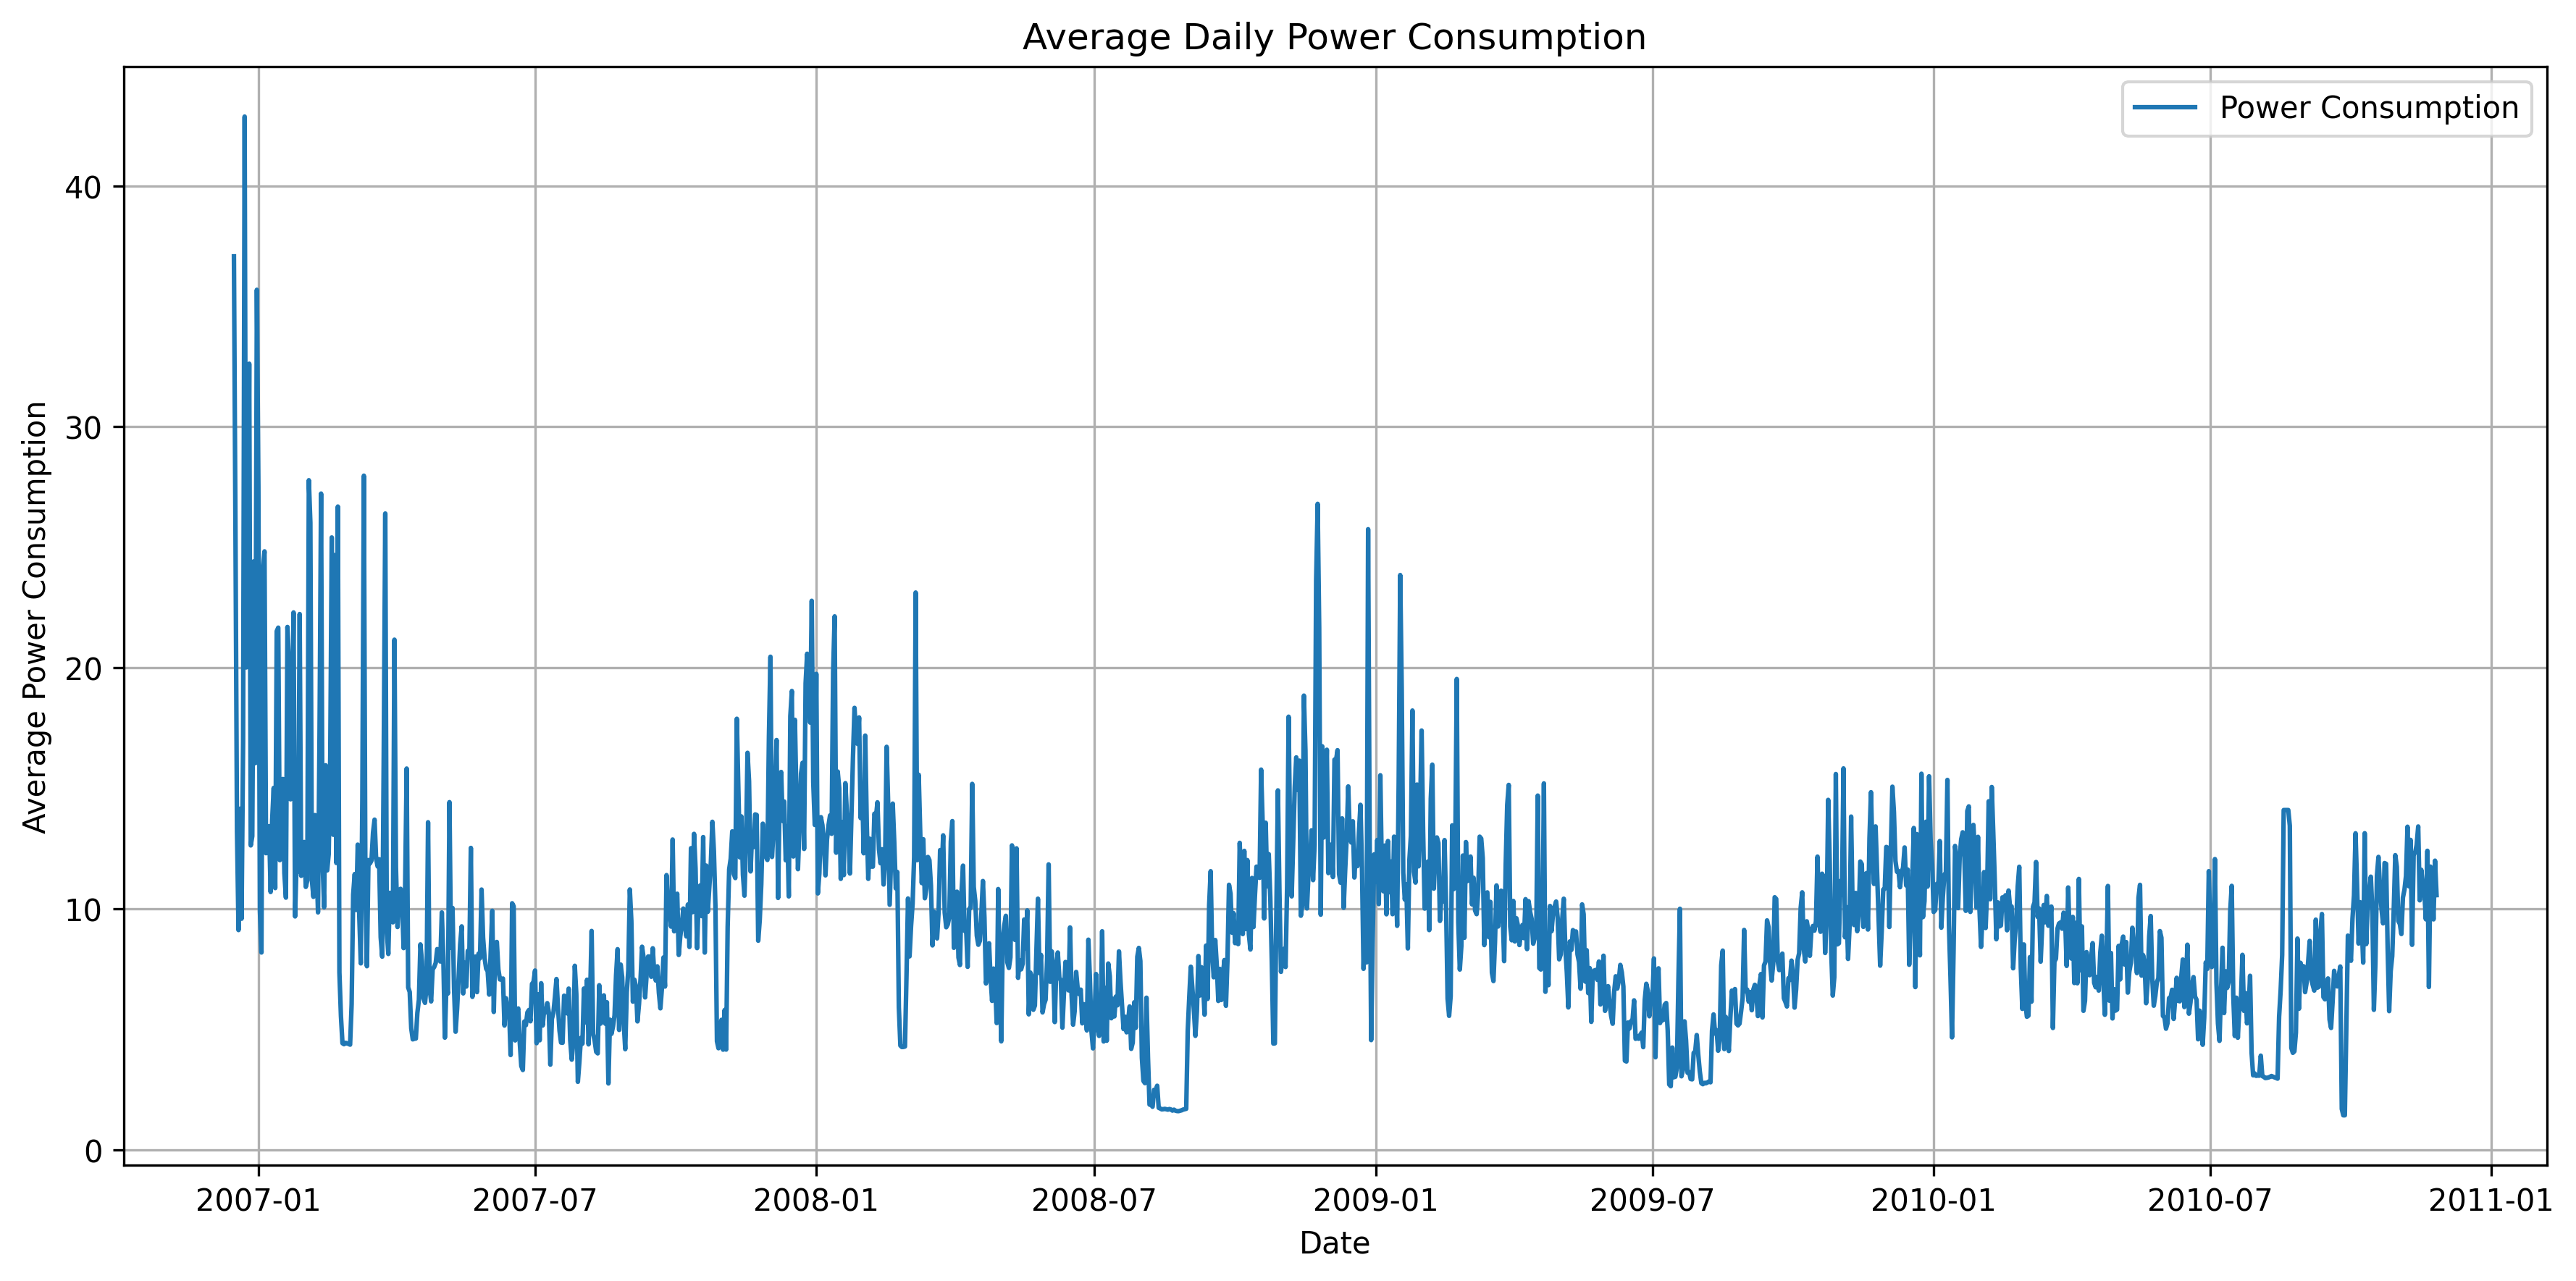

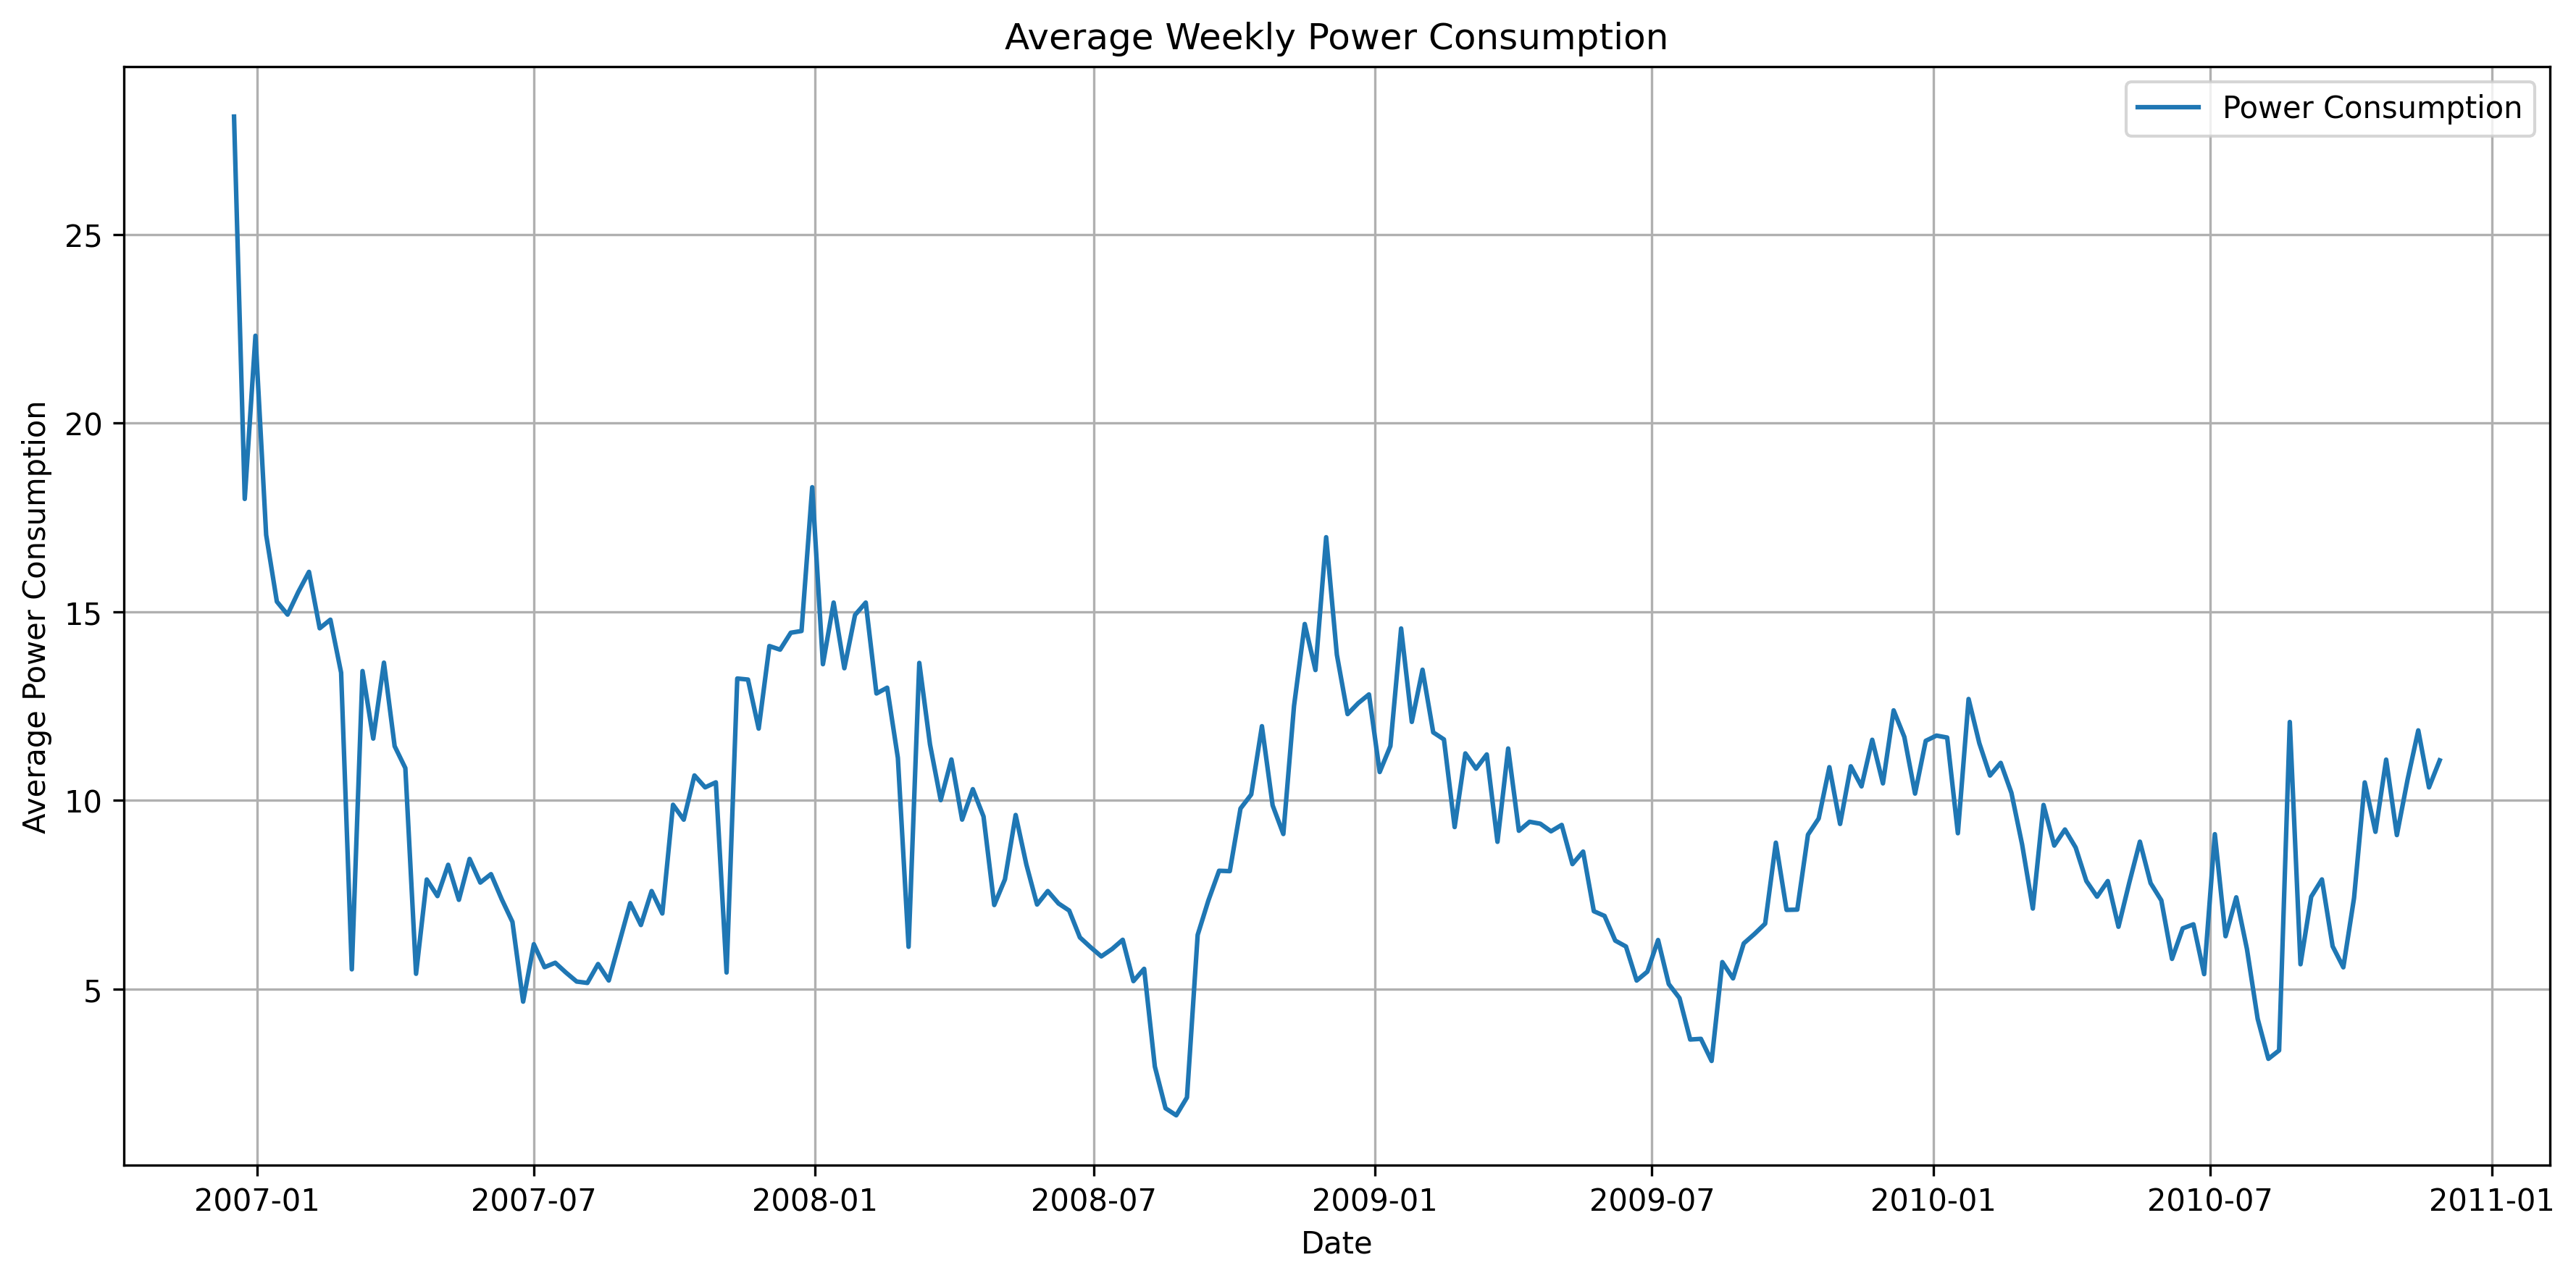

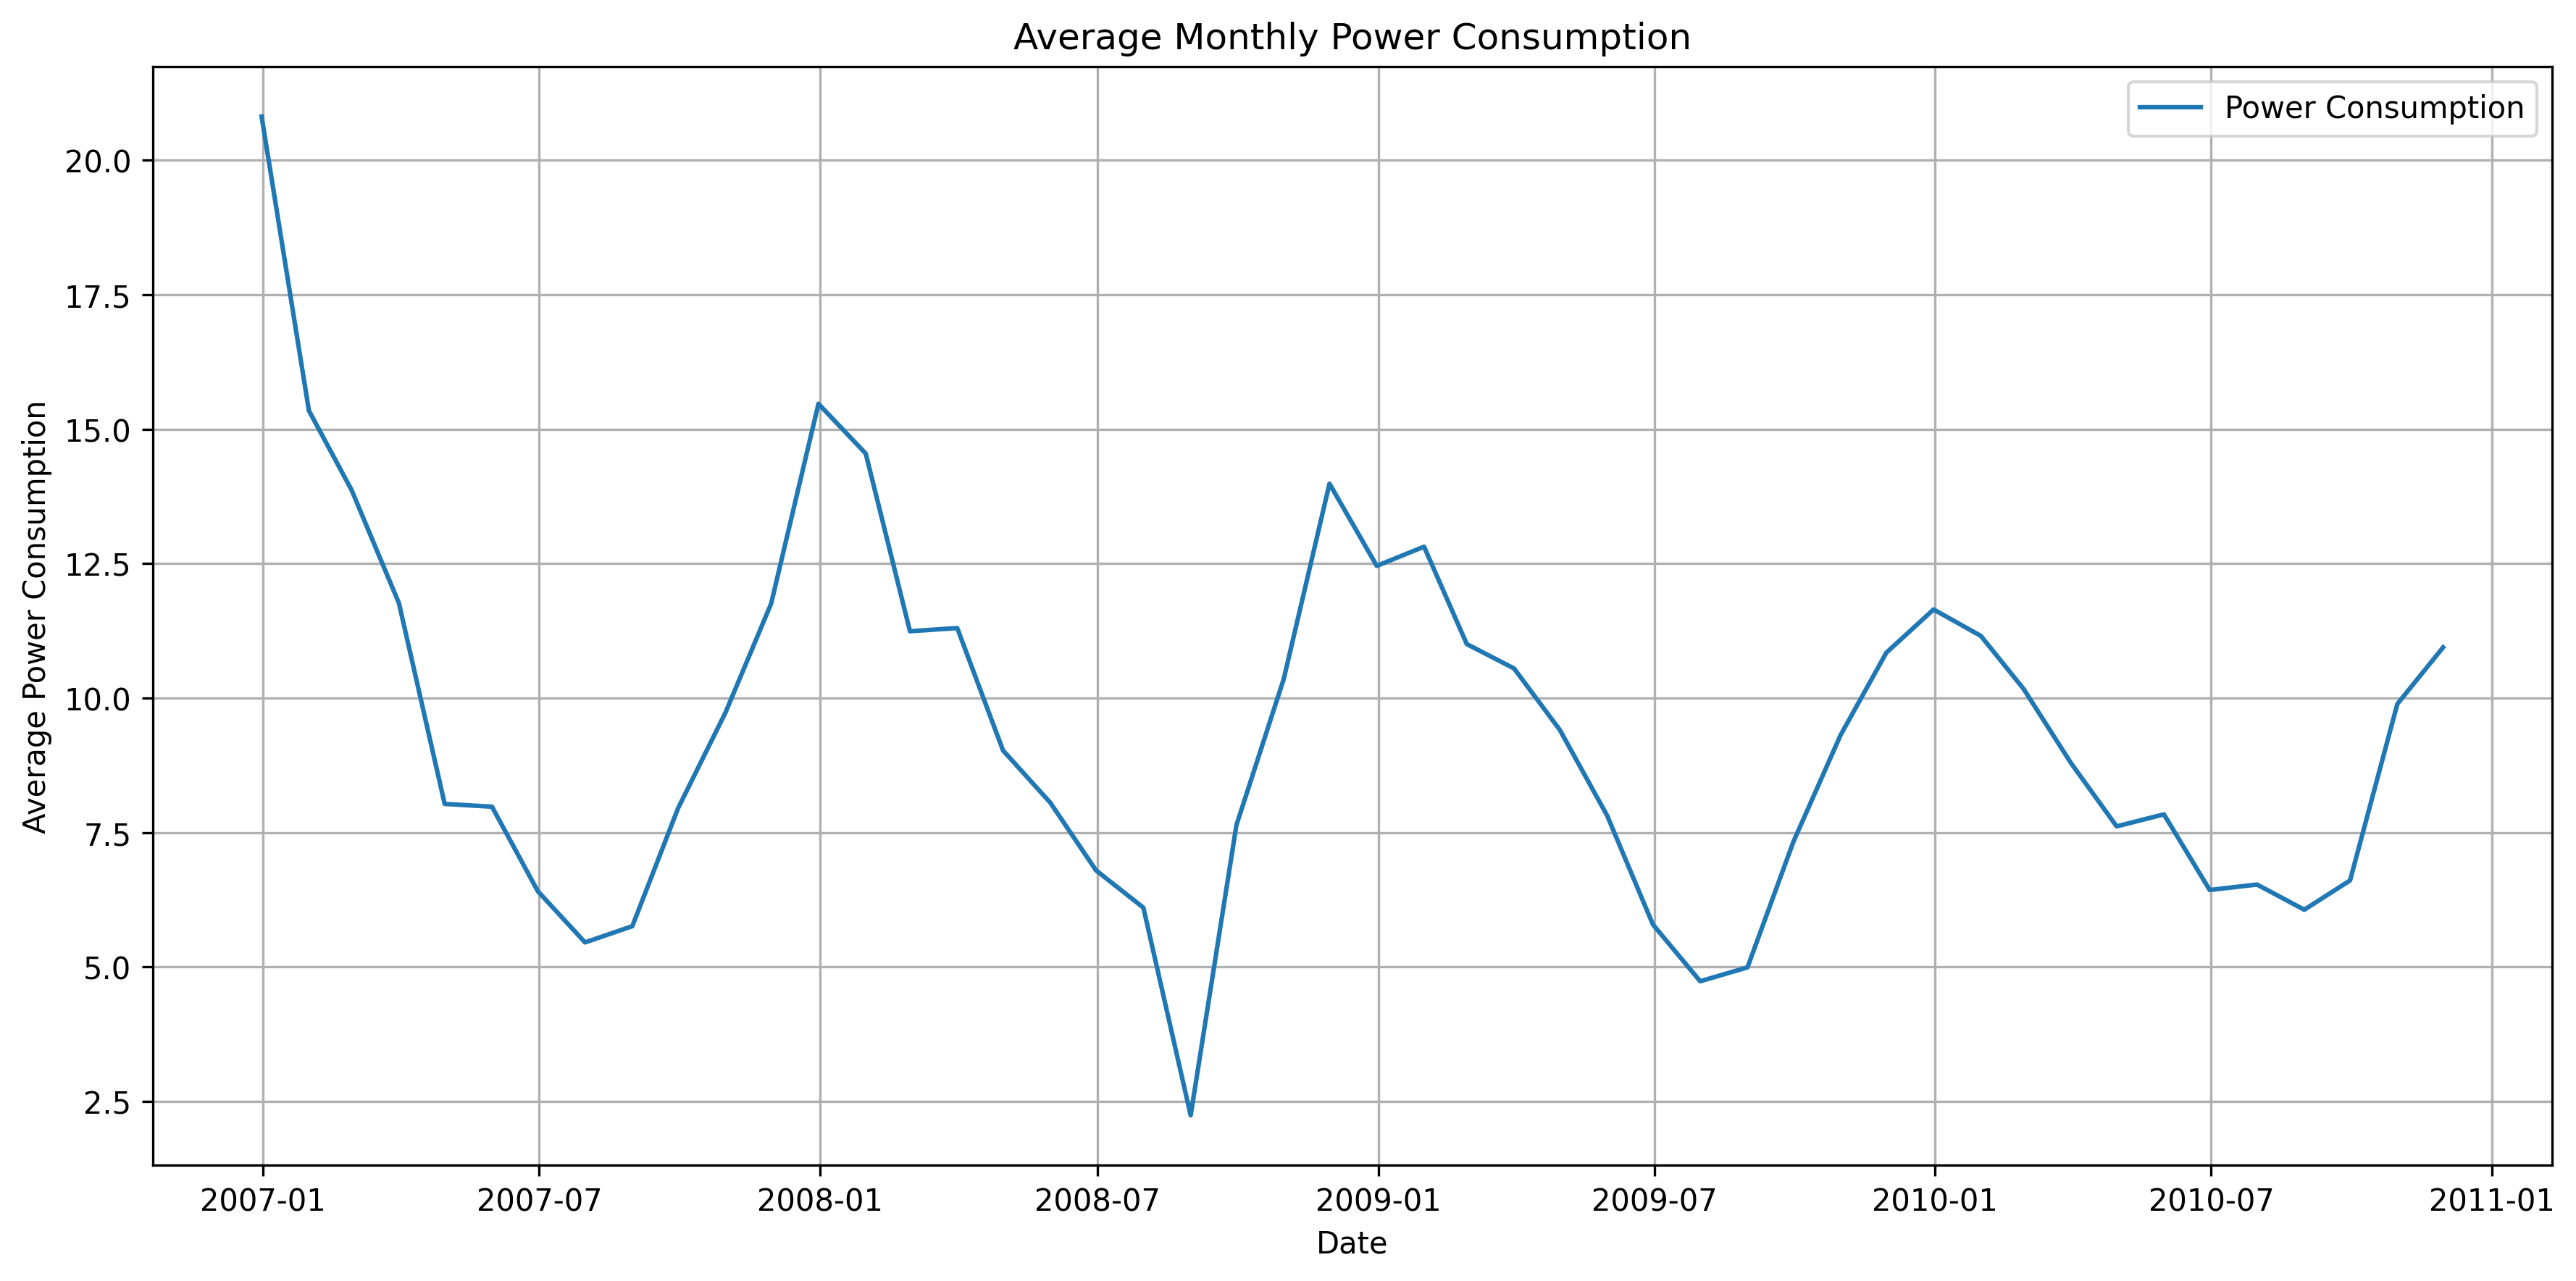

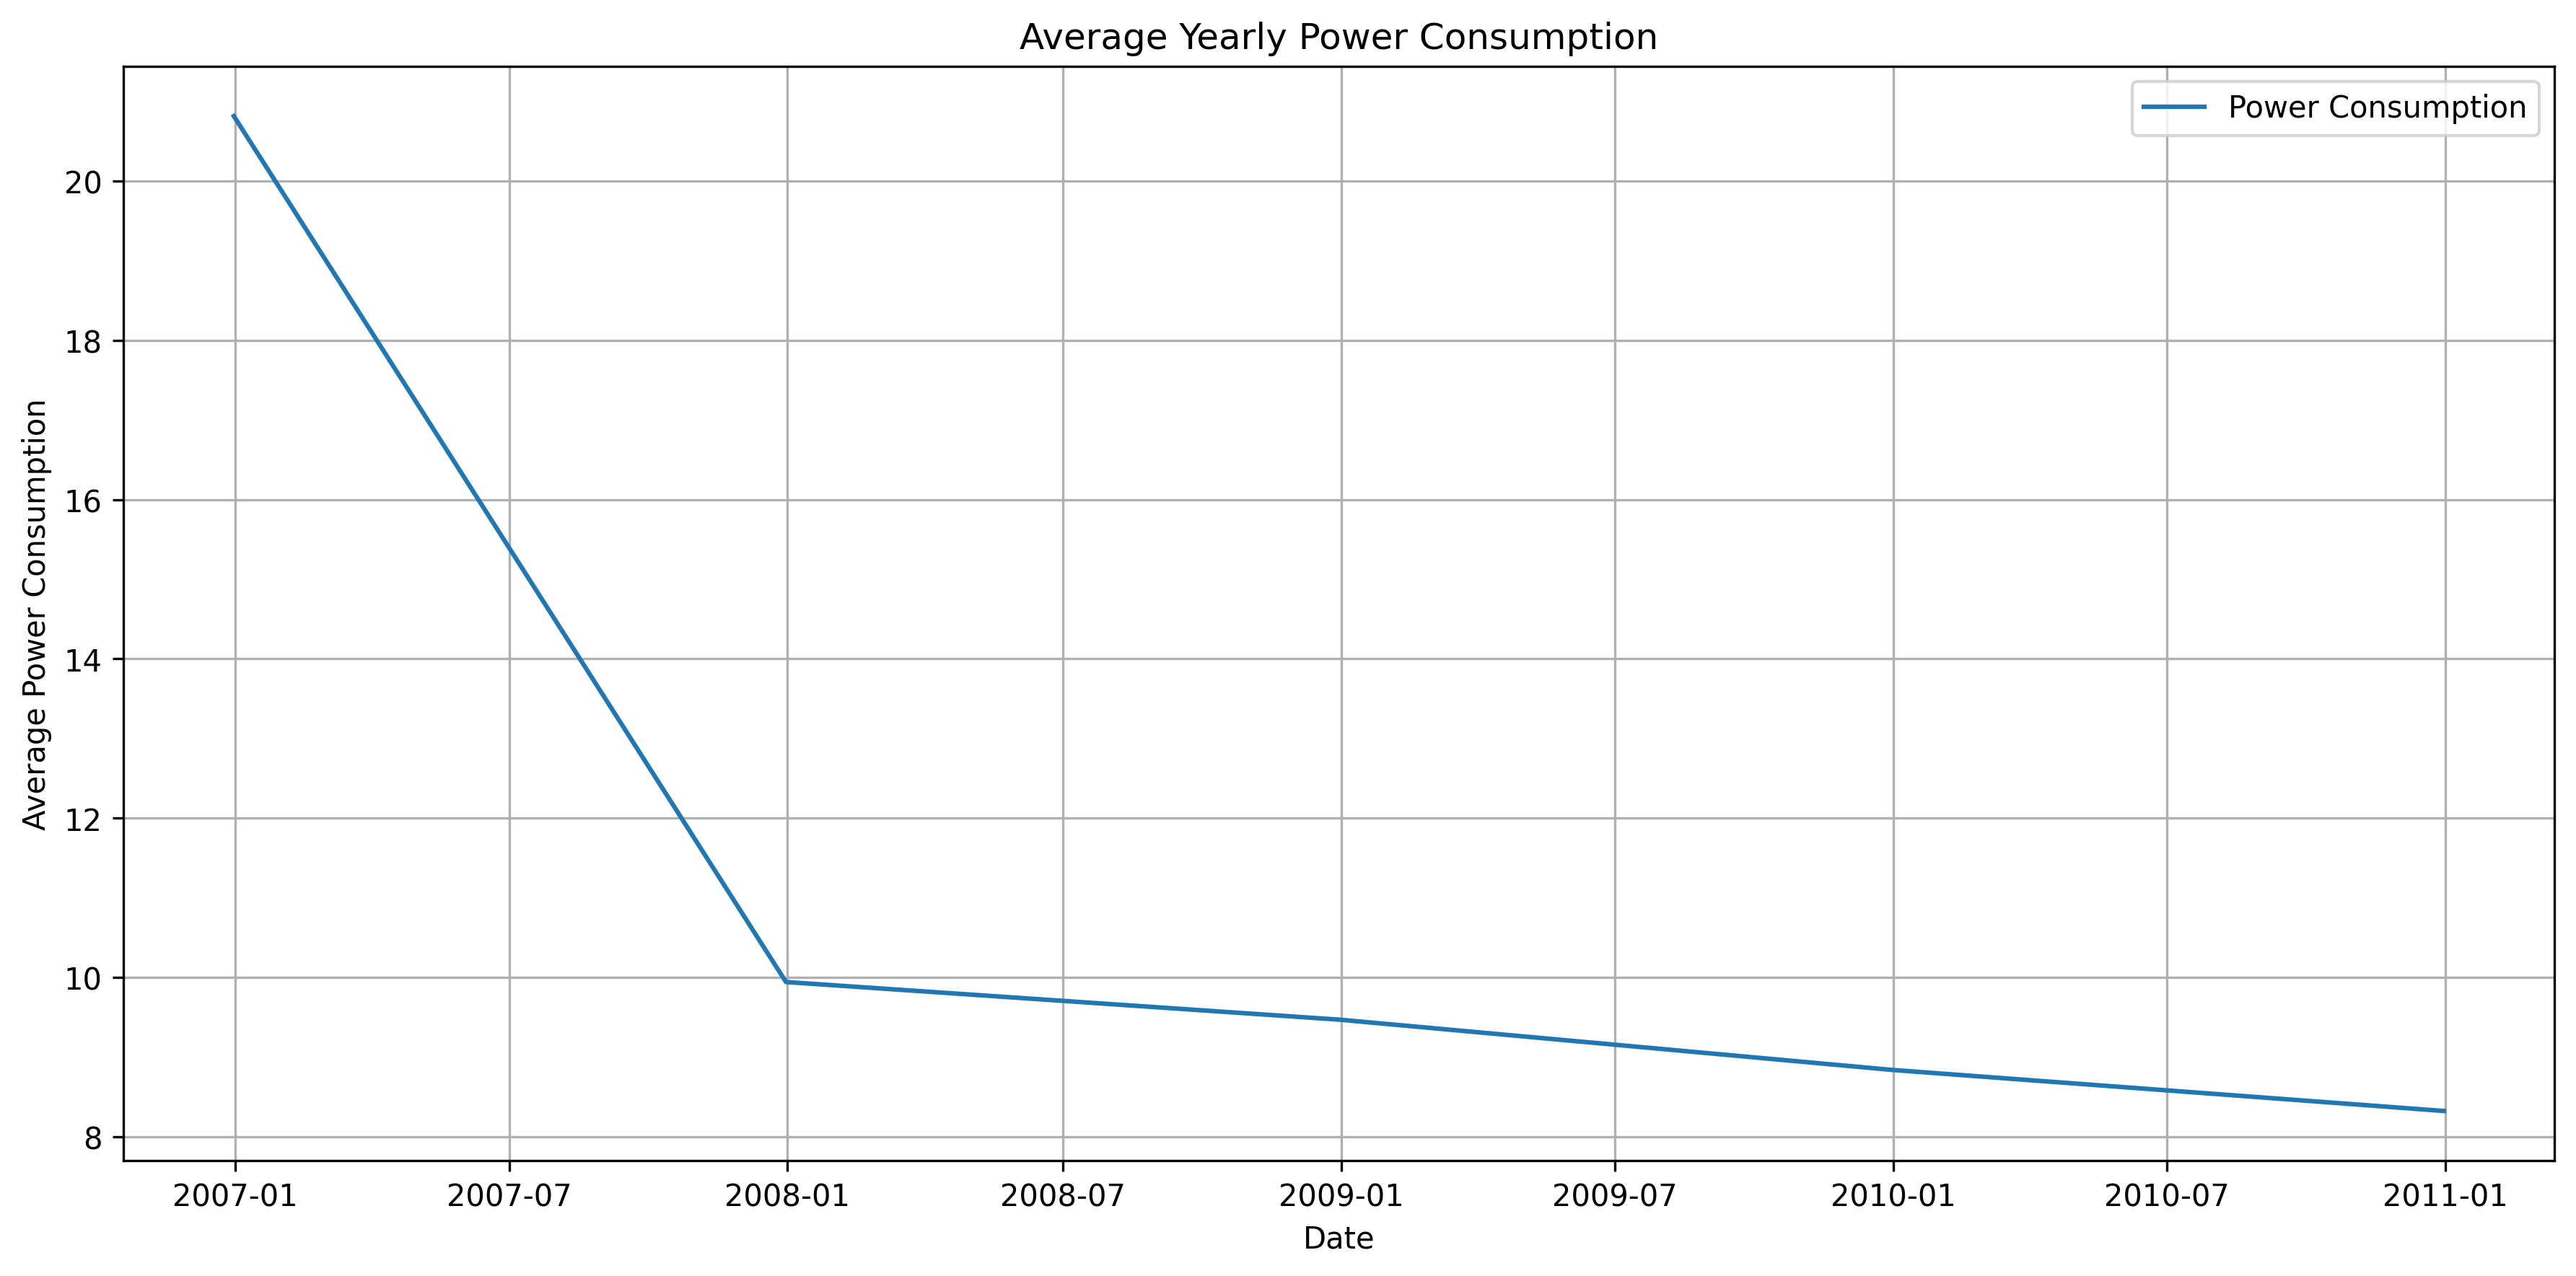

In [ ]:
# Plot daily, weekly, monthly and yearly Power Consumption
plot_power_consumption(daily_resampled.power_consumption, 'Average Daily Power Consumption')
plot_power_consumption(weekly_resampled.power_consumption, 'Average Weekly Power Consumption')
plot_power_consumption(monthly_resampled.power_consumption, 'Average Monthly Power Consumption')
plot_power_consumption(yearly_resampled.power_consumption, 'Average Yearly Power Consumption')

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

from statsmodels.tsa.stattools import adfuller

def adfuller_test(time_series, autolag='AIC', verbose=True):

    result = adfuller(time_series, autolag=autolag)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    results = {label: value for label, value in zip(labels, result[:4])}
    results['Critical Values'] = result[4]

    if verbose:
        for label, value in results.items():
            if label != 'Critical Values':
                print(f'{label} : {value}')
            else:
                print('Critical Values:')
                for key, val in value.items():
                    print(f'    {key}: {val}')
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")
    else:
        return results

In [ ]:
#adfuller_test(hourly_resampled.power_consumption)

In [ ]:
adfuller_test(daily_resampled.power_consumption)

ADF Test Statistic : -3.5168611300349952
p-value : 0.0075644776353892725
#Lags Used : 21
Number of Observations Used : 1420
Critical Values:
    1%: -3.4349634933241084
    5%: -2.8635775363009244
    10%: -2.5678547733584605
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(weekly_resampled.power_consumption)

ADF Test Statistic : -4.601866292337161
p-value : 0.00012815039146996766
#Lags Used : 12
Number of Observations Used : 194
Critical Values:
    1%: -3.4645146202692527
    5%: -2.8765564361715534
    10%: -2.5747745328940375
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(monthly_resampled.power_consumption)

ADF Test Statistic : -1.86102581666389
p-value : 0.35061193357832404
#Lags Used : 9
Number of Observations Used : 38
Critical Values:
    1%: -3.6155091011809297
    5%: -2.941262357486514
    10%: -2.6091995013850418
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [ ]:
adfuller_test(yearly_resampled.power_consumption)

ADF Test Statistic : -17.109770727063257
p-value : 7.379344574861477e-30
#Lags Used : 0
Number of Observations Used : 4
Critical Values:
    1%: -7.355440625
    5%: -4.474365000000001
    10%: -3.1269325
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
'''def test_stationarity(df):
    # Calculate rolling mean and standard deviation
    rolmean = df.rolling(window=30).mean()
    rolstd = df.rolling(window=30).std()

    # Plot original timeseries, rolling mean, and rolling standard deviation
    plt.figure(figsize=(20,5))
    sns.despine(left=True)
    orig = plt.plot(df, color='purple',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='cyan', label = 'Rolling Std')

    # Add legend
    plt.legend(loc='best')
    # Add title
    plt.title('Rolling Mean & Standard Deviation of Global Active Power')
    plt.show()

    # Perform and display results of Dickey-Fuller test
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    '''

"def test_stationarity(df):\n    # Calculate rolling mean and standard deviation\n    rolmean = df.rolling(window=30).mean()\n    rolstd = df.rolling(window=30).std()\n\n    # Plot original timeseries, rolling mean, and rolling standard deviation\n    plt.figure(figsize=(20,5))\n    sns.despine(left=True)\n    orig = plt.plot(df, color='purple',label='Original')\n    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')\n    std = plt.plot(rolstd, color='cyan', label = 'Rolling Std')\n\n    # Add legend\n    plt.legend(loc='best')\n    # Add title\n    plt.title('Rolling Mean & Standard Deviation of Global Active Power')\n    plt.show()\n\n    # Perform and display results of Dickey-Fuller test\n    print ('<Results of Dickey-Fuller Test>')\n    dftest = adfuller(df, autolag='AIC')\n    dfoutput = pd.Series(dftest[0:4],\n                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])\n    for key,value in dftest[4].items():\n        dfoutput

In [ ]:
df1 = daily_resampled[['power_consumption']]
df1

,power_consumption
date_time,
2006-12-16,37.073064
2006-12-17,25.657407
2006-12-18,13.214190
2006-12-19,9.119375
2006-12-20,14.156111
...,...
2010-11-22,11.753194
2010-11-23,11.355741
2010-11-24,9.562130


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(df1)

# Convert the result back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df1.columns)

Train & Test Split

In [ ]:
train_size = int(len(scaled_df) * 0.8)  # 80% of data for training
train_df = scaled_df[:train_size]
test_df = scaled_df[train_size:]


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [ ]:
acf_original = plot_acf(train_df)
pacf_original = plot_pacf(train_df)

In [ ]:
model = ARIMA(train_df, order=(2,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(len(test_df))

In [ ]:
plt.plot(df1.index, df1['power_consumption'], color='blue', label='Actual Power Consumption')
plt.plot(forecast.index, forecast.values, color='red', label='Predicted Power Consumption')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
#!pip install pmdarima
#from pmdarima import auto_arima

In [ ]:
'''# Fit Auto ARIMA model
model = auto_arima(df1["power_consumption"])  # Example with monthly seasonality
# Example: Make predictions for the next 10 time steps
forecast = model.predict(len(test_df))
print(forecast)
'''

In [ ]:
plt.plot(df1.index, df1['power_consumption'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Auto ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df1, model='additive')

In [ ]:
import itertools
p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))

len(pdq_combination)

In [ ]:
rmse=[]
order1=[]

In [ ]:
'''for pdq in pdq_combination:
  try:
    model = ARIMA(train_df,order=pdq).fit()
    pred = model.predict(start=test_df.index[0], end=test_df.index[-10], dynamic=False)
    error=np.sqrt(mean_squared_error(test_df,pred))
    order1.append(pdq)
    rmse.append(error)

  except:
    continue
    '''

In [ ]:
#result = pd.DataFrame(index=order1, data=rmse, columns=["RMSE"])
#result.to_csv("ARIMA_result.csv")

In [ ]:
#result

In [ ]:
#model = ARIMA(df_train, order=(2,1,0))
#model_fit = model.fit()
#print(model_fit.summary())

# Modelling and Evaluation (LSTM)

In [ ]:

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

# Import math library
import math

# Import necessary functions from keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Import mean squared error and mean absolute error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping

In [ ]:
# Transform the Global_active_power column of the data DataFrame into a numpy array of float values
dataset = df1.power_consumption.values.astype('float32')

#Reshape the numpy array into a 2D array with 1 column
dataset = np.reshape(dataset, (-1, 1))

#Create an instance of the MinMaxScaler class to scale the values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

#Fit the MinMaxScaler to the transformed data and transform the values
dataset = scaler.fit_transform(dataset)

#Split the transformed data into a training set (80%) and a test set (20%)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1122, 30), (1122,), (258, 30), (258,))

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

X_train.shape, X_test.shape

((1122, 1, 30), (258, 1, 30))

In [ ]:
# Reshape input to be [samples, time steps, width, height, channels] for Conv2D
XX_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1, 1))
XX_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1, 1))
XX_train.shape, XX_test.shape

ValueError: cannot reshape array of size 33660 into shape (1122,1,1,1,1)

# LSTM model

In [ ]:
model = Sequential()
model.add(Conv2D(64, (2, 1), strides=(1, 1)), input_shape=(X_train.shape[1], X_train.shape[2]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1), strides=(2, 1)))
model.add(Conv2D(64, (2, 1), strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1), strides=(2, 1)))
model.add(LSTM(64, return_sequences=True))
model.add(Activation('tanh'))
model.add(LSTM(64, return_sequences=False))
model.add(Activation('tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(60, activation='relu'))

TypeError: Sequential.add() got an unexpected keyword argument 'input_shape'

In [ ]:
# Defining the LSTM model
model = Sequential()

# Adding the first layer with 100 LSTM units and input shape of the data
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Adding a dense layer with 1 unit to make predictions
model.add(Dense(1))

# Compiling the model with mean squared error as the loss function and using Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model on training data and using early stopping to avoid overfitting
history = model.fit(X_train, Y_train, epochs=20, batch_size=124, validation_data=(X_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Displaying a summary of the model
model.summary()

Epoch 1/20
10/10 [==============================] - 9s 142ms/step - loss: 0.0165 - val_loss: 0.0042
Epoch 2/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0082 - val_loss: 0.0042
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0036
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0060 - val_loss: 0.0034
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0057 - val_loss: 0.0035
Epoch 6/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 8/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 9/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0055 - val_loss: 0.0031
Epoch 10/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 11/20
10

# Evaluation

In [ ]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

9/9 [==============================] - 0s 3ms/step
Train Mean Absolute Error: 1.916446926882778
Train Root Mean Squared Error: 2.7515281817905777
Test Mean Absolute Error: 1.6331683273067212
Test Root Mean Squared Error: 2.167369533936087


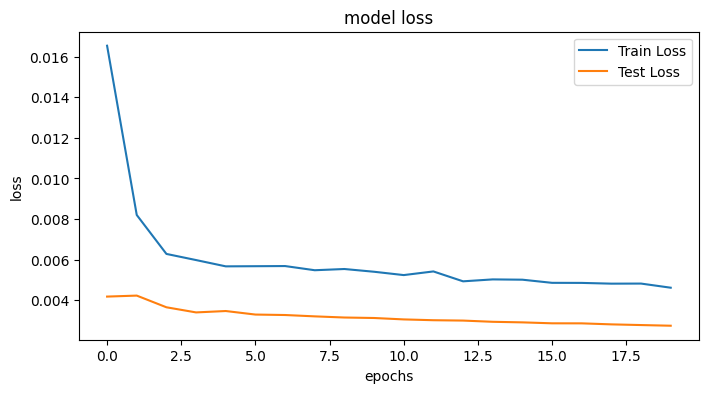

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

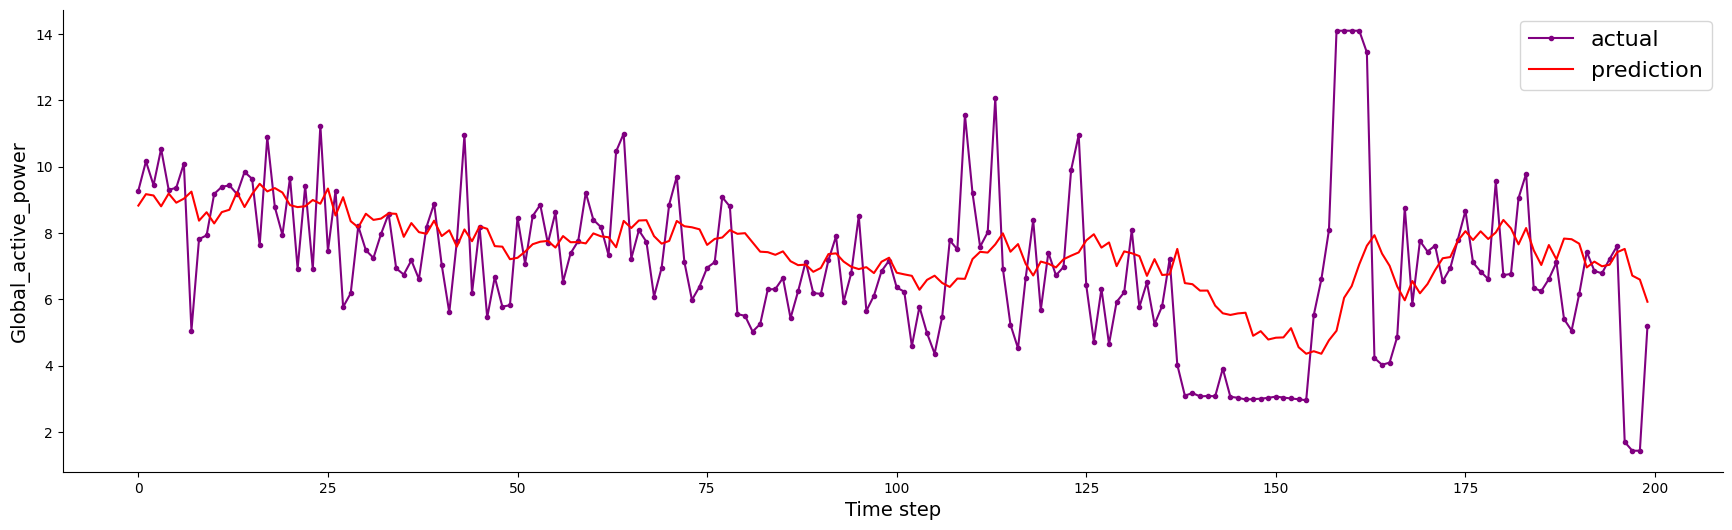

In [ ]:
aa=[x for x in range(200)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[0][:200], marker='.', label="actual", color='purple')

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict[:,0][:200], '-', label="prediction", color='red')

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()